In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [2]:
fund = pd.read_csv('/Users/apinyasubsingha/Desktop/Data Science/Last Semester /7150CEM Data Science Project (Dissertation)/School Funding /Dataset/school-funding-statistics_2022-23/school_funding_allocation_2022_23.csv')

In [3]:
print(fund.shape)
fund.head()

(20177, 57)


,time_period,time_identifier,geographic_level,country_code,country_name,old_la_code,new_la_code,la_name,school_ukprn,school_urn,...,allocation_per_pupil,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding
0,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10000222,101247,...,6658.346870,291560,296,x,x,x,81972,49248,249881,8542828.0
1,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10000527,101241,...,6817.784488,492993,501,x,x,x,148598,84024,389143,13420859.0
2,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10071309,101202,...,5524.276364,209135,151,44741,20720,472,21895,24138,80619,3439599.0
3,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10071301,101231,...,5542.356295,153735,111,29116,19540,354,17927,18117,62142,2633909.0
4,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10029207,136028,...,7127.415584,511215,519,x,x,x,164595,91017,288410,9836214.0


In [4]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20177 entries, 0 to 20176
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   time_period                                20177 non-null  int64  
 1   time_identifier                            20177 non-null  object 
 2   geographic_level                           20177 non-null  object 
 3   country_code                               20177 non-null  object 
 4   country_name                               20177 non-null  object 
 5   old_la_code                                20177 non-null  int64  
 6   new_la_code                                20177 non-null  object 
 7   la_name                                    20177 non-null  object 
 8   school_ukprn                               20177 non-null  int64  
 9   school_urn                                 20177 non-null  int64  
 10  school_laestab        

In [5]:
fund.describe().T

,count,mean,std,min,25%,50%,75%,max
time_period,20177.0,2.022230e+05,0.000000e+00,202223.0,2.022230e+05,2.022230e+05,2.022230e+05,202223.0
old_la_code,20177.0,7.024099e+02,2.609454e+02,201.0,3.720000e+02,8.500000e+02,8.910000e+02,941.0
school_ukprn,20177.0,1.006348e+07,1.873333e+04,10000001.0,1.004886e+07,1.007074e+07,1.007672e+07,10090415.0
school_urn,20177.0,1.273799e+05,1.544759e+04,100000.0,1.133690e+05,1.310080e+05,1.415870e+05,149097.0
school_laestab,20177.0,7.027089e+06,2.609466e+06,2013614.0,3.722133e+06,8.504002e+06,8.912821e+06,9416910.0
basic_entitlement_primary,20177.0,7.342936e+05,5.687895e+05,0.0,3.042840e+05,6.594850e+05,1.129069e+06,5409029.0
basic_entitlement_ks3,20177.0,4.342193e+05,1.042028e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8075509.0
basic_entitlement_ks4,20177.0,3.095584e+05,7.533470e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5476346.0
basic_entitlement_total_funding,20177.0,1.478071e+06,1.585192e+06,0.0,5.854940e+05,8.781570e+05,1.444612e+06,13551855.0
fsm_funding,20177.0,4.120218e+04,5.122973e+04,0.0,9.827000e+03,2.542500e+04,5.452000e+04,1195018.0


In [6]:
# Assign missing value == 0 

fund[['universal_infant_free_school_meals_grant','pe_&_sport_premium','pe_&_sport_premium_pupils','pupil_premium','pupil_premium_pupils','coronavirus_recovery_premium_funding','School_led_tutoring_funding','schools_supplementary_grant','lac_total_funding']] = fund[['universal_infant_free_school_meals_grant','pe_&_sport_premium','pe_&_sport_premium_pupils','pupil_premium','pupil_premium_pupils','coronavirus_recovery_premium_funding','School_led_tutoring_funding','schools_supplementary_grant','lac_total_funding']].replace(regex='([a-zA-Z*])', value=0).astype(int)

In [7]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20177 entries, 0 to 20176
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   time_period                                20177 non-null  int64  
 1   time_identifier                            20177 non-null  object 
 2   geographic_level                           20177 non-null  object 
 3   country_code                               20177 non-null  object 
 4   country_name                               20177 non-null  object 
 5   old_la_code                                20177 non-null  int64  
 6   new_la_code                                20177 non-null  object 
 7   la_name                                    20177 non-null  object 
 8   school_ukprn                               20177 non-null  int64  
 9   school_urn                                 20177 non-null  int64  
 10  school_laestab        

In [8]:
fund['trust'] = fund['trust'].replace('z','None')
fund['trust']

0                                  None
1                                  None
2                                  None
3                                  None
4                                  None
                      ...              
20172    SOUTH YORK MULTI ACADEMY TRUST
20173                              None
20174    SOUTH BANK MULTI ACADEMY TRUST
20175                              None
20176    SOUTH BANK MULTI ACADEMY TRUST
Name: trust, Length: 20177, dtype: object

In [9]:
# delete unnecessary features
fund.drop(['time_period','time_identifier','geographic_level',
           'country_code','country_name','school_ukprn','school_urn','school_laestab',
          'old_la_code','new_la_code','school_name','trust']
          ,axis='columns',inplace=True)

In [10]:
# Deleting breakdown cost --> keep only the summary cost 
fund.drop(['basic_entitlement_primary','basic_entitlement_ks3','basic_entitlement_ks4',
          'idaci_band_a','idaci_band_b','idaci_band_c','idaci_band_d','idaci_band_e',
           'idaci_band_f','fsm_funding','fsm6_funding'],axis='columns',inplace=True)

In [11]:
fund.shape

(20177, 34)

# SCALING NUMERIC

In [12]:
# divided numerical and categorical 

fund_categorical_col = list(range(0,4))
fund_num = fund.iloc[:,4:]
fund_cat = fund.iloc[:,0:4]

# StandardScaler

scaled_num = StandardScaler().fit_transform(fund_num)
scaled_num = pd.DataFrame(scaled_num, columns= fund_num.columns)

#  PCA BEFORE K-PROTOTYPE

In [13]:
scaled_num

,basic_entitlement_total_funding,idaci_funding,deprivation_total_funding,lac_total_funding,eal_total_funding,mobility_total_funding,prior_attainment_total_funding,lump_sum_total_funding,sparsity_total_funding,london_fringe,...,allocation_per_pupil,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding
0,3.062023,4.253841,3.237796,-0.046876,0.850054,-0.305459,2.099336,0.864418,-0.326961,-0.122482,...,1.157866,1.585371,1.912214,-1.108197,-2.260849,-1.296884,2.139358,1.932899,3.150521,2.948104
1,5.168817,4.211660,4.399099,-0.046876,1.935856,-0.305459,4.119976,0.864418,-0.326961,-0.122482,...,1.286309,3.375938,3.846165,-1.108197,-2.260849,-1.296884,4.430175,3.904065,5.446900,5.227835
2,0.399915,0.900863,0.698434,-0.046876,3.410102,2.205087,0.722810,0.864418,-0.326961,-0.122482,...,0.244263,0.852684,0.544297,1.840381,0.790267,1.916998,0.073716,0.509619,0.359452,0.563127
3,0.087415,0.514468,0.327199,-0.046876,1.340476,0.843045,0.624282,0.864418,-0.326961,-0.122482,...,0.258828,0.360225,0.166941,0.810643,0.616506,1.113528,-0.062716,0.168338,0.054773,0.186591
4,3.236505,5.048351,4.922371,-0.046876,2.993077,0.781453,3.243229,0.864418,-0.326961,-0.122482,...,1.535747,3.537916,4.015976,-1.108197,-2.260849,-1.296884,4.980204,4.300441,3.785850,3.552563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,-0.546850,-0.646491,-0.750716,-0.046876,-0.575714,-0.305459,-0.563787,-0.367994,-0.326961,-0.122482,...,-0.736223,-0.994036,-0.870790,0.168086,0.348503,-0.125723,-0.610338,-0.831019,-0.603938,-0.632384
20173,-0.427112,-0.636564,-0.698903,-0.046876,-0.539754,-0.305459,-0.623143,-0.367994,-0.326961,-0.122482,...,-0.682241,-0.895544,-0.795318,0.335348,0.420658,0.207921,-0.610338,-0.739195,-0.498355,-0.495479
20174,-0.122694,-0.322067,-0.213218,-0.046876,-0.500671,-0.305459,0.087046,-0.367994,-0.326961,-0.122482,...,-0.770208,0.052438,-0.068907,0.775450,0.594418,1.011392,-0.245360,-0.087241,-0.126761,-0.134821
20175,-0.163283,-0.138755,-0.168781,-0.046876,-0.223657,-0.305459,0.019866,-0.367994,-0.326961,-0.122482,...,-0.645296,0.003193,-0.106643,1.470730,0.588528,0.984156,-0.255331,-0.096423,-0.177022,-0.146534


In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_num)

pca.explained_variance_ratio_

array([4.46853166e-01, 9.56771763e-02, 6.45304545e-02, 4.28639119e-02,
       3.76695361e-02, 3.45652387e-02, 3.40280803e-02, 3.34150932e-02,
       3.17423220e-02, 3.01141993e-02, 2.77101763e-02, 2.57655686e-02,
       2.54332765e-02, 1.81790900e-02, 1.41529666e-02, 9.72336706e-03,
       9.46827248e-03, 6.71257692e-03, 4.08596786e-03, 2.93191815e-03,
       2.65647552e-03, 9.65292900e-04, 4.01175330e-04, 1.71417795e-04,
       9.35027215e-05, 7.22184678e-05, 1.75584949e-05, 3.58504211e-33,
       3.58504211e-33, 2.77013591e-33])

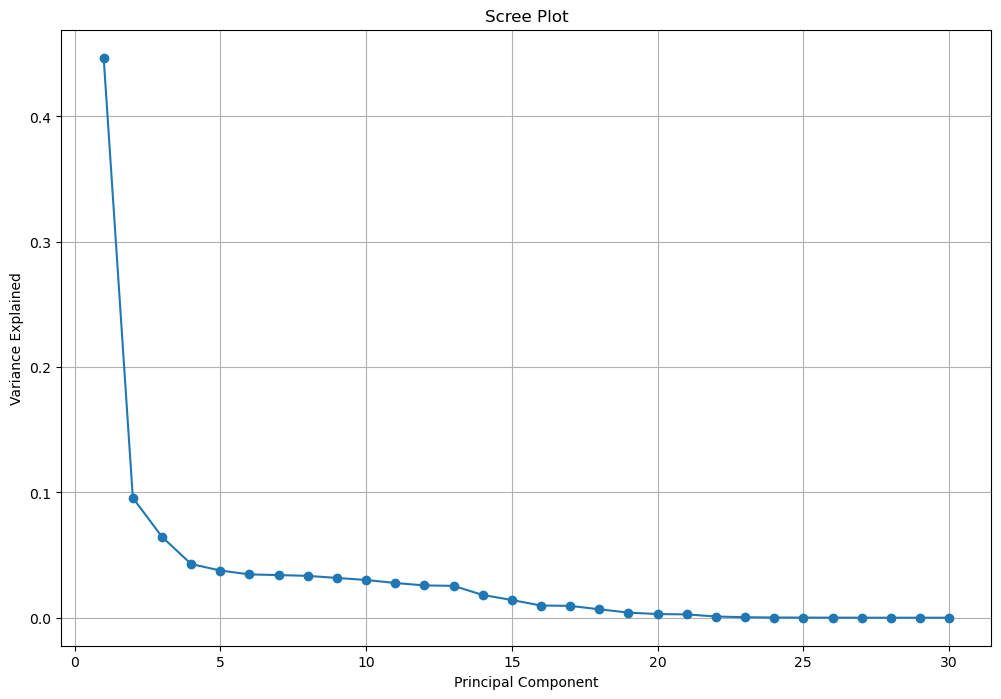

In [15]:
PC_values = np.arange(pca.n_components_) + 1

plt.figure(figsize = (12,8))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

In [16]:
pca.explained_variance_ratio_

array([4.46853166e-01, 9.56771763e-02, 6.45304545e-02, 4.28639119e-02,
       3.76695361e-02, 3.45652387e-02, 3.40280803e-02, 3.34150932e-02,
       3.17423220e-02, 3.01141993e-02, 2.77101763e-02, 2.57655686e-02,
       2.54332765e-02, 1.81790900e-02, 1.41529666e-02, 9.72336706e-03,
       9.46827248e-03, 6.71257692e-03, 4.08596786e-03, 2.93191815e-03,
       2.65647552e-03, 9.65292900e-04, 4.01175330e-04, 1.71417795e-04,
       9.35027215e-05, 7.22184678e-05, 1.75584949e-05, 3.58504211e-33,
       3.58504211e-33, 2.77013591e-33])

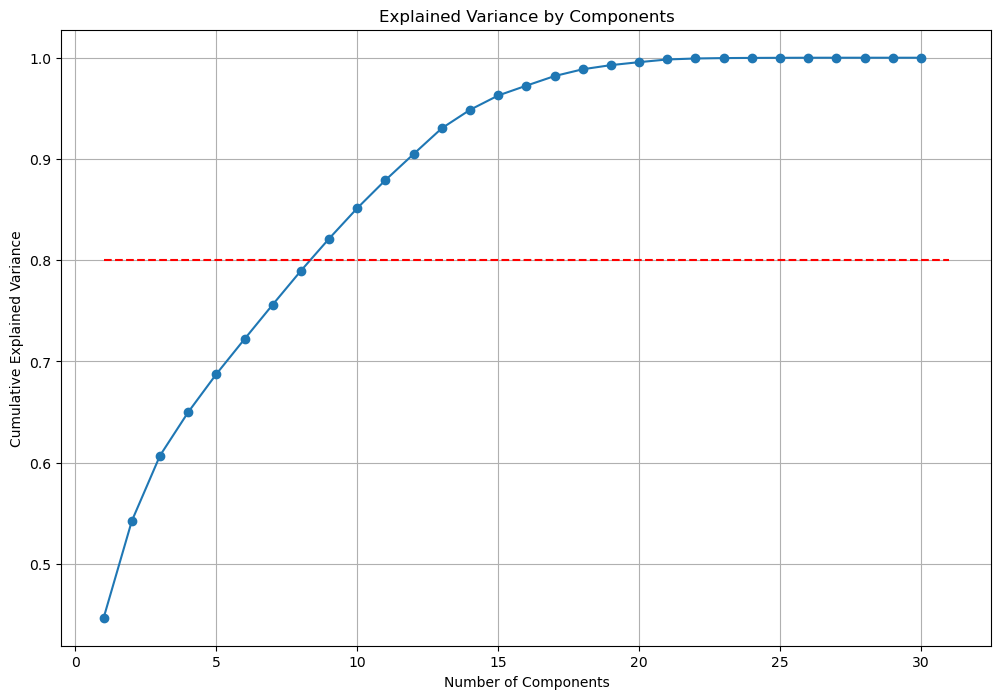

In [17]:
plt.figure(figsize = (12,8))
plt.plot(range(1,31), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.plot([1,31], [0.80,0.80], color='r',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [18]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_explained_variance)

[0.44685317 0.54253034 0.6070608  0.64992471 0.68759424 0.72215948
 0.75618756 0.78960266 0.82134498 0.85145918 0.87916935 0.90493492
 0.9303682  0.94854729 0.96270026 0.97242362 0.9818919  0.98860447
 0.99269044 0.99562236 0.99827883 0.99924413 0.9996453  0.99981672
 0.99991022 0.99998244 1.         1.         1.         1.        ]


In [21]:
# Based on the Rule of Thumb is to preserve around 80% of the variance -> to avoid over fitting 
# decice to keep 9 or 10 components

In [22]:
# choose 9 component
pca = PCA(n_components = 9)
pca.fit(scaled_num)

score_pca = pca.transform(scaled_num)
print(score_pca)

[[ 9.98530096  1.57386929 -0.34981328 ... -0.4919227   0.34829563
   0.30009202]
 [18.21379537 -1.93431019 -2.02271448 ...  4.08076036  2.79759561
  11.81460142]
 [ 2.25094846 -4.0140761   1.99627001 ... -0.37691746 -0.52031275
  -0.35841572]
 ...
 [-0.72313851 -1.17862163 -0.6253231  ... -0.04685699  0.12893135
   0.03358612]
 [-0.68584676 -1.61586035 -0.22375307 ...  0.43065771 -0.03124601
  -0.08493018]
 [ 5.67272277  2.02264106 -0.2884016  ... -0.31645911  0.40192904
   0.359637  ]]


In [23]:
pca = PCA(n_components = 9)
pca_num = pca.fit_transform(scaled_num)

pca_num = pd.DataFrame(pca_num, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

combined_fund = pd.concat([fund_cat,pca_num],axis = 1)

## CHECKING NUMBER OF K (ELBOW PLOT)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 530364.2211814468
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 530364.2211814468
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 530364.2211814468
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 530364.2211814468
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 530364.2211814468
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 530364.2211814468
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 530364.2211814468
Init: initial

Run: 2, iteration: 2/100, moves: 895, ncost: 282091.87344992516
Run: 2, iteration: 3/100, moves: 115, ncost: 282048.52169776044
Run: 2, iteration: 4/100, moves: 49, ncost: 282042.33675992856
Run: 2, iteration: 5/100, moves: 23, ncost: 282041.8042784121
Run: 2, iteration: 6/100, moves: 10, ncost: 282041.5092640787
Run: 2, iteration: 7/100, moves: 2, ncost: 282041.4942470404
Run: 2, iteration: 8/100, moves: 0, ncost: 282041.4942470404
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 3101, ncost: 284918.34490552713
Run: 3, iteration: 2/100, moves: 1008, ncost: 283659.70068490435
Run: 3, iteration: 3/100, moves: 903, ncost: 282458.9817042941
Run: 3, iteration: 4/100, moves: 546, ncost: 282128.8590898726
Run: 3, iteration: 5/100, moves: 227, ncost: 282083.1358299154
Run: 3, iteration: 6/100, moves: 94, ncost: 282073.2192341145
Run: 3, iteration: 7/100, moves: 37, ncost: 282072.1127384237
Run: 3, iteration: 8/100, moves: 17, nco

Run: 2, iteration: 1/100, moves: 2405, ncost: 264431.5797630061
Run: 2, iteration: 2/100, moves: 1146, ncost: 263657.8768208581
Run: 2, iteration: 3/100, moves: 398, ncost: 263496.1861862132
Run: 2, iteration: 4/100, moves: 131, ncost: 263469.540705032
Run: 2, iteration: 5/100, moves: 80, ncost: 263463.12767797755
Run: 2, iteration: 6/100, moves: 19, ncost: 263462.5592954604
Run: 2, iteration: 7/100, moves: 8, ncost: 263462.48155322816
Run: 2, iteration: 8/100, moves: 4, ncost: 263462.4625251175
Run: 2, iteration: 9/100, moves: 2, ncost: 263462.45881241834
Run: 2, iteration: 10/100, moves: 0, ncost: 263462.45881241834
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 2889, ncost: 270718.7167523002
Run: 3, iteration: 2/100, moves: 1248, ncost: 267703.90452081716
Run: 3, iteration: 3/100, moves: 861, ncost: 266835.2732392223
Run: 3, iteration: 4/100, moves: 391, ncost: 266684.01027171785
Run: 3, iteration: 5/100, moves: 181, 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4249, ncost: 240752.4916018012
Run: 1, iteration: 2/100, moves: 1873, ncost: 235626.22950288063
Run: 1, iteration: 3/100, moves: 796, ncost: 234821.02784972495
Run: 1, iteration: 4/100, moves: 364, ncost: 234595.0887370553
Run: 1, iteration: 5/100, moves: 226, ncost: 234516.97428577143
Run: 1, iteration: 6/100, moves: 147, ncost: 234483.4964888838
Run: 1, iteration: 7/100, moves: 116, ncost: 234459.78150447336
Run: 1, iteration: 8/100, moves: 102, ncost: 234446.20006599318
Run: 1, iteration: 9/100, moves: 78, ncost: 234437.65695583334
Run: 1, iteration: 10/100, moves: 71, ncost: 234425.97439653738
Run: 1, iteration: 11/100, moves: 61, ncost: 234422.98881854885
Run: 1, iteration: 12/100, moves: 40, ncost: 234420.75061208487
Run: 1, iteration: 13/100, moves: 37, ncost: 234418.53372715975
Run: 1, iteration: 14/100, moves: 28, ncost: 234417.5995092843
Run: 1, iteration: 15/100, 

Run: 7, iteration: 8/100, moves: 149, ncost: 230773.85846586188
Run: 7, iteration: 9/100, moves: 104, ncost: 230765.06564655036
Run: 7, iteration: 10/100, moves: 55, ncost: 230762.87884111356
Run: 7, iteration: 11/100, moves: 34, ncost: 230761.941171556
Run: 7, iteration: 12/100, moves: 22, ncost: 230761.14441328018
Run: 7, iteration: 13/100, moves: 5, ncost: 230761.0830438195
Run: 7, iteration: 14/100, moves: 5, ncost: 230761.02097402132
Run: 7, iteration: 15/100, moves: 3, ncost: 230761.0013588029
Run: 7, iteration: 16/100, moves: 0, ncost: 230761.0013588029
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 11672, ncost: 258942.32758260993
Run: 8, iteration: 2/100, moves: 3535, ncost: 249979.2425564342
Run: 8, iteration: 3/100, moves: 1022, ncost: 249481.60590671934
Run: 8, iteration: 4/100, moves: 287, ncost: 249425.58850996188
Run: 8, iteration: 5/100, moves: 113, ncost: 249416.51998897348
Run: 8, iteration: 6/100, move

Run: 4, iteration: 9/100, moves: 98, ncost: 217683.06358589546
Run: 4, iteration: 10/100, moves: 53, ncost: 217681.14868747606
Run: 4, iteration: 11/100, moves: 19, ncost: 217680.80260641218
Run: 4, iteration: 12/100, moves: 4, ncost: 217680.78575364014
Run: 4, iteration: 13/100, moves: 0, ncost: 217680.78575364014
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 5329, ncost: 227277.92817193264
Run: 5, iteration: 2/100, moves: 1695, ncost: 225367.6566259695
Run: 5, iteration: 3/100, moves: 703, ncost: 225141.52463711504
Run: 5, iteration: 4/100, moves: 375, ncost: 225062.13232032908
Run: 5, iteration: 5/100, moves: 340, ncost: 224996.47769064936
Run: 5, iteration: 6/100, moves: 359, ncost: 224934.76327576366
Run: 5, iteration: 7/100, moves: 393, ncost: 224843.83161824752
Run: 5, iteration: 8/100, moves: 513, ncost: 224704.69968645868
Run: 5, iteration: 9/100, moves: 1053, ncost: 224073.7769832262
Run: 5, iteration: 10/100,

Run: 1, iteration: 10/100, moves: 3, ncost: 209669.53083319656
Run: 1, iteration: 11/100, moves: 0, ncost: 209669.53083319656
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3579, ncost: 222796.23715315995
Run: 2, iteration: 2/100, moves: 1593, ncost: 219930.4974207691
Run: 2, iteration: 3/100, moves: 888, ncost: 218581.2048852757
Run: 2, iteration: 4/100, moves: 560, ncost: 217723.30390875664
Run: 2, iteration: 5/100, moves: 378, ncost: 217339.71447437457
Run: 2, iteration: 6/100, moves: 232, ncost: 217186.1300351291
Run: 2, iteration: 7/100, moves: 188, ncost: 217128.56195731
Run: 2, iteration: 8/100, moves: 122, ncost: 217101.3856332408
Run: 2, iteration: 9/100, moves: 74, ncost: 217095.29756325277
Run: 2, iteration: 10/100, moves: 74, ncost: 217089.90679770644
Run: 2, iteration: 11/100, moves: 90, ncost: 217084.20234601304
Run: 2, iteration: 12/100, moves: 71, ncost: 217077.61231896371
Run: 2, iteration: 13/100, moves

Run: 7, iteration: 13/100, moves: 5, ncost: 205241.26617546097
Run: 7, iteration: 14/100, moves: 0, ncost: 205241.26617546097
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 3944, ncost: 216594.0356463566
Run: 8, iteration: 2/100, moves: 1991, ncost: 211248.7083863968
Run: 8, iteration: 3/100, moves: 1178, ncost: 210211.96579942267
Run: 8, iteration: 4/100, moves: 635, ncost: 209942.99126794955
Run: 8, iteration: 5/100, moves: 323, ncost: 209864.72330240047
Run: 8, iteration: 6/100, moves: 182, ncost: 209834.68255886214
Run: 8, iteration: 7/100, moves: 80, ncost: 209830.12520678705
Run: 8, iteration: 8/100, moves: 44, ncost: 209828.65781548567
Run: 8, iteration: 9/100, moves: 19, ncost: 209828.2364439846
Run: 8, iteration: 10/100, moves: 7, ncost: 209828.17475270858
Run: 8, iteration: 11/100, moves: 2, ncost: 209828.16709045274
Run: 8, iteration: 12/100, moves: 4, ncost: 209828.15676135384
Run: 8, iteration: 13/100, moves

Run: 1, iteration: 19/100, moves: 25, ncost: 199491.51554731018
Run: 1, iteration: 20/100, moves: 17, ncost: 199491.02111322863
Run: 1, iteration: 21/100, moves: 9, ncost: 199490.88823573006
Run: 1, iteration: 22/100, moves: 3, ncost: 199490.88277199256
Run: 1, iteration: 23/100, moves: 0, ncost: 199490.88277199256
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 6838, ncost: 223145.6206474079
Run: 2, iteration: 2/100, moves: 4434, ncost: 207970.74178136297
Run: 2, iteration: 3/100, moves: 2108, ncost: 204050.3464899429
Run: 2, iteration: 4/100, moves: 639, ncost: 203313.1903338955
Run: 2, iteration: 5/100, moves: 210, ncost: 203187.58732828862
Run: 2, iteration: 6/100, moves: 93, ncost: 203153.01483412393
Run: 2, iteration: 7/100, moves: 39, ncost: 203145.70112379457
Run: 2, iteration: 8/100, moves: 27, ncost: 203139.73435801943
Run: 2, iteration: 9/100, moves: 21, ncost: 203136.00984923297
Run: 2, iteration: 10/100, move

Starting iterations...
Run: 7, iteration: 1/100, moves: 3250, ncost: 210590.57080673322
Run: 7, iteration: 2/100, moves: 881, ncost: 208591.98423176716
Run: 7, iteration: 3/100, moves: 382, ncost: 208343.31493856336
Run: 7, iteration: 4/100, moves: 352, ncost: 208271.57355956675
Run: 7, iteration: 5/100, moves: 257, ncost: 208213.1077722884
Run: 7, iteration: 6/100, moves: 221, ncost: 208176.44976851938
Run: 7, iteration: 7/100, moves: 247, ncost: 208138.99459942774
Run: 7, iteration: 8/100, moves: 245, ncost: 208101.7686831648
Run: 7, iteration: 9/100, moves: 222, ncost: 208069.6159271645
Run: 7, iteration: 10/100, moves: 223, ncost: 208025.76137229407
Run: 7, iteration: 11/100, moves: 312, ncost: 207911.40452351517
Run: 7, iteration: 12/100, moves: 395, ncost: 207811.62825183466
Run: 7, iteration: 13/100, moves: 463, ncost: 207691.84580663798
Run: 7, iteration: 14/100, moves: 535, ncost: 207546.46493393017
Run: 7, iteration: 15/100, moves: 855, ncost: 207152.70115036622
Run: 7, itera

Run: 1, iteration: 36/100, moves: 131, ncost: 196235.8203224473
Run: 1, iteration: 37/100, moves: 132, ncost: 196206.34032254256
Run: 1, iteration: 38/100, moves: 119, ncost: 196189.1485214861
Run: 1, iteration: 39/100, moves: 100, ncost: 196176.85439298602
Run: 1, iteration: 40/100, moves: 65, ncost: 196168.13733003856
Run: 1, iteration: 41/100, moves: 40, ncost: 196166.02325313076
Run: 1, iteration: 42/100, moves: 31, ncost: 196165.49864659464
Run: 1, iteration: 43/100, moves: 6, ncost: 196165.47512837255
Run: 1, iteration: 44/100, moves: 0, ncost: 196165.47512837255
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 5236, ncost: 206551.2204014878
Run: 2, iteration: 2/100, moves: 2507, ncost: 200629.6360482413
Run: 2, iteration: 3/100, moves: 1754, ncost: 196945.58481213267
Run: 2, iteration: 4/100, moves: 874, ncost: 196529.10097398428
Run: 2, iteration: 5/100, moves: 424, ncost: 196454.02247657962
Run: 2, iteration: 6/10

Run: 6, iteration: 7/100, moves: 268, ncost: 192021.51033700834
Run: 6, iteration: 8/100, moves: 254, ncost: 191260.78501929805
Run: 6, iteration: 9/100, moves: 217, ncost: 190594.9413363703
Run: 6, iteration: 10/100, moves: 187, ncost: 190529.94670858106
Run: 6, iteration: 11/100, moves: 141, ncost: 190508.69244161216
Run: 6, iteration: 12/100, moves: 84, ncost: 190502.91661161723
Run: 6, iteration: 13/100, moves: 75, ncost: 190498.5389635798
Run: 6, iteration: 14/100, moves: 54, ncost: 190495.8524898914
Run: 6, iteration: 15/100, moves: 19, ncost: 190495.51827574905
Run: 6, iteration: 16/100, moves: 7, ncost: 190495.4932368054
Run: 6, iteration: 17/100, moves: 1, ncost: 190495.49148632278
Run: 6, iteration: 18/100, moves: 0, ncost: 190495.49148632278
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 5676, ncost: 208647.3804731316
Run: 7, iteration: 2/100, moves: 4403, ncost: 199573.14727519813
Run: 7, iteration: 3/100, mo

Run: 10, iteration: 26/100, moves: 28, ncost: 190413.59118682408
Run: 10, iteration: 27/100, moves: 28, ncost: 190412.780680781
Run: 10, iteration: 28/100, moves: 11, ncost: 190412.6023125269
Run: 10, iteration: 29/100, moves: 0, ncost: 190412.6023125269
Best run was number 4
Sum distance (Cost) of candidate k
1 : 530364.221
2 : 323015.559
3 : 282041.494
4 : 249418.726
5 : 230761.001
6 : 217676.504
7 : 205241.266
8 : 195315.528
9 : 187440.720


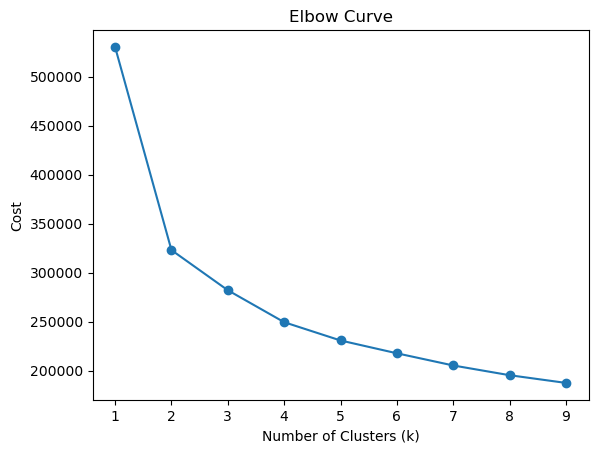

In [25]:
no_clusters = range(1,10)
costs = {}
for k in no_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', verbose=2, n_init=10)
    kproto_test = kproto.fit_predict(combined_fund, categorical=fund_categorical_col)
    
    costs[k] = kproto.cost_
    
print('Sum distance (Cost) of candidate k')
for keys, values in costs.items():
    print(keys,':',f'{values:.3f}')
          
plt.plot(costs.keys() , costs.values(), marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.show()

## Knee Locator - check number of K

In [26]:
# KneeLocator class will detect elbows if curve is convex; if voncave will detect knees

from kneed import KneeLocator 

knee_cost = KneeLocator(
    x = list(costs.keys()), 
    y = list(costs.values()),
    S=0.1, curve = 'convex' , direction='decreasing',online=True)
K_cost = knee_cost.elbow
print('elbow at k=',f'{K_cost:.0f} clusters')


elbow at k= 2 clusters


In [27]:
def cluster_results(df):
    result_df = df.groupby('Cluster').agg({
        'Cluster' :lambda x: x.value_counts(),
        'la_name' :lambda x: x.value_counts().index[0],
        'school_type' :lambda x: x.value_counts().index[0],
        'school_phase' :lambda x:x.value_counts().index[0],
        'academy' :lambda x:x.value_counts().index[0],
        'basic_entitlement_total_funding': 'mean',
        'idaci_funding' : 'mean',
        'deprivation_total_funding' : 'mean',
        'lac_total_funding' : 'mean',
        'eal_total_funding' : 'mean',
        'mobility_total_funding' : 'mean',
        'prior_attainment_total_funding' : 'mean',
        'lump_sum_total_funding' : 'mean',
        'sparsity_total_funding' : 'mean',
        'london_fringe' : 'mean',
        'split_site_total_funding' :'mean',
        'national_non_domestic_rates_funding' :'mean',
        'pfi_total_funding' : 'mean',
        'exceptional_factors_total_funding' : 'mean',
        'minimum_per_pupil_funding' : 'mean',
        'total_schools_block_allocation_(pre_mfg)' :'mean',
        'mfg_protection_or_capping_scaling' : 'mean',
        'total_schools_block_allocation_(post_mfg)' :'mean',
        'notional_sen' :'mean',
        'total_number_of_pupils' :'mean',
        'allocation_per_pupil' :'mean',
        'pupil_premium' :'mean',
        'universal_infant_free_school_meals_grant': 'mean',
        'pe_&_sport_premium' :'mean',
        'pe_&_sport_premium_pupils' :'mean',
        'coronavirus_recovery_premium_funding' :'mean',
        'School_led_tutoring_funding' :'mean',
        'schools_supplementary_grant' :'mean',
        'total_funding' : 'mean'
    
    }).round(2)

    return result_df

In [28]:
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=2, n_init=10)
kproto_cluster = kproto.fit_predict(combined_fund, categorical = fund_categorical_col)

fund['Cluster'] = kproto_cluster

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5908, ncost: 343562.6079163304
Run: 1, iteration: 2/100, moves: 1806, ncost: 324374.5889753437
Run: 1, iteration: 3/100, moves: 370, ncost: 323055.9126641486
Run: 1, iteration: 4/100, moves: 68, ncost: 323018.6129834468
Run: 1, iteration: 5/100, moves: 15, ncost: 323016.74001493386
Run: 1, iteration: 6/100, moves: 6, ncost: 323016.191469772
Run: 1, iteration: 7/100, moves: 9, ncost: 323015.5805731948
Run: 1, iteration: 8/100, moves: 1, ncost: 323015.5594732652
Run: 1, iteration: 9/100, moves: 0, ncost: 323015.5594732652
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 805, ncost: 323100.2362828134
Run: 2, iteration: 2/100, moves: 99, ncost: 323019.6520534753
Run: 2, iteration: 3/100, moves: 20, ncost: 323016.2423217253
Run: 2, iteration: 4/100, moves: 6, ncost: 323015.7549406269
Run: 2, iteration: 5/100, moves: 

In [29]:
cluster_results(fund).T

Cluster,0,1
Cluster,2919,17258
la_name,Birmingham,Lancashire
school_type,Academy converter,Community school
school_phase,Secondary,Primary
academy,Yes,No
basic_entitlement_total_funding,4853019.94,907235.95
idaci_funding,242047.01,41290.12
deprivation_total_funding,594357.42,108556.33
lac_total_funding,110.65,2.9
eal_total_funding,42101.58,16593.92


In [30]:
fund['Cluster'].value_counts()

1    17258
0     2919
Name: Cluster, dtype: int64

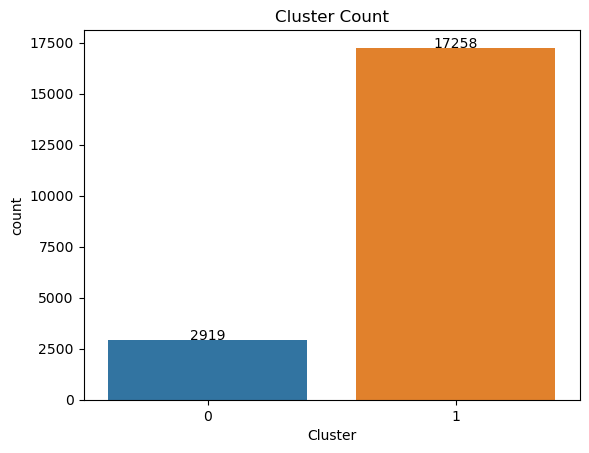

In [31]:
ax=sns.countplot(x=fund.Cluster)
for index, row in pd.DataFrame(fund['Cluster'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

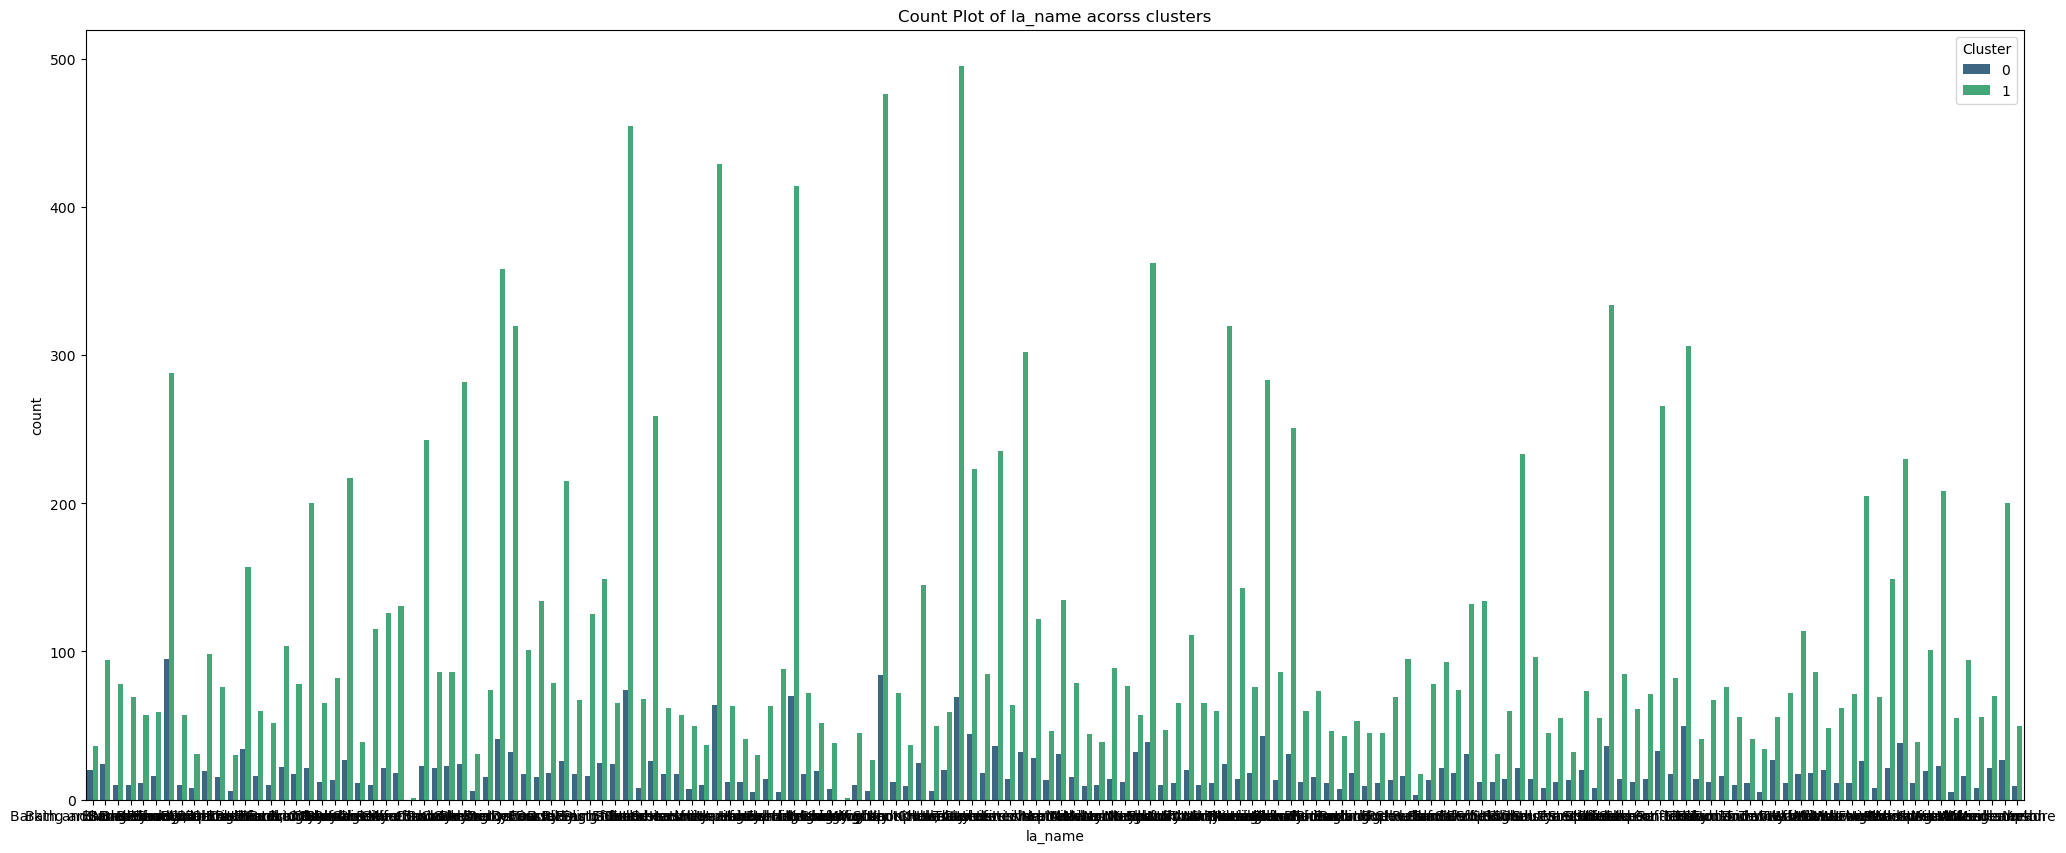

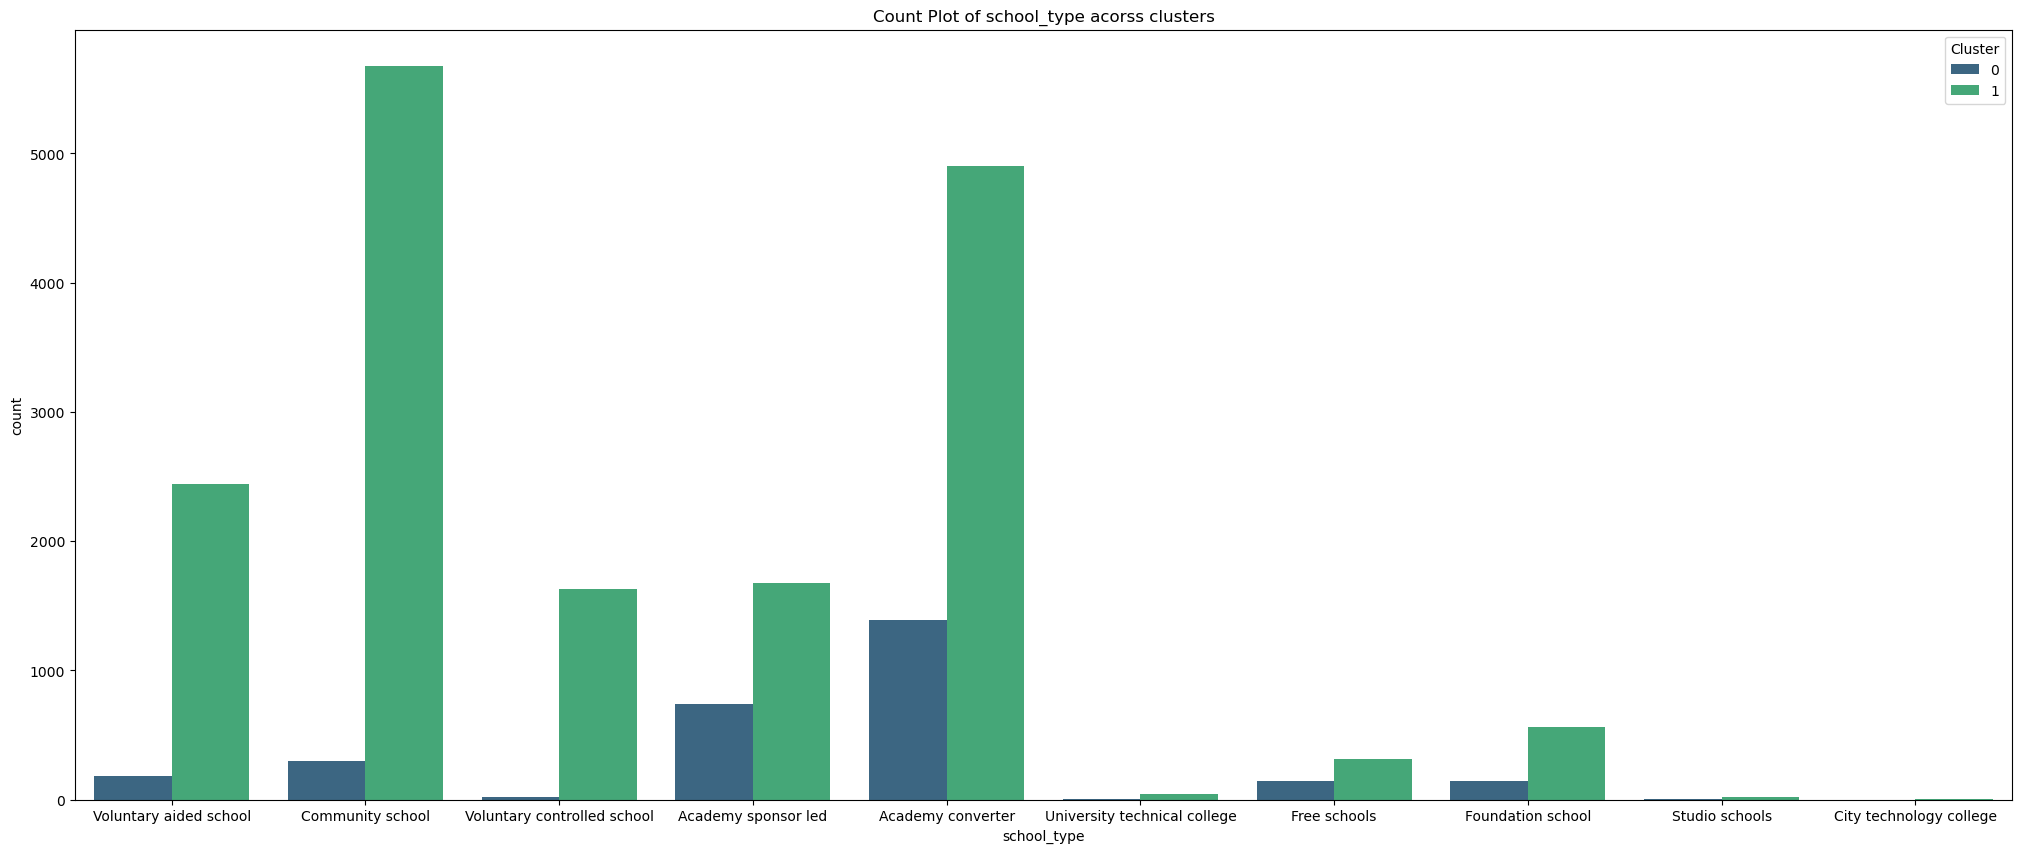

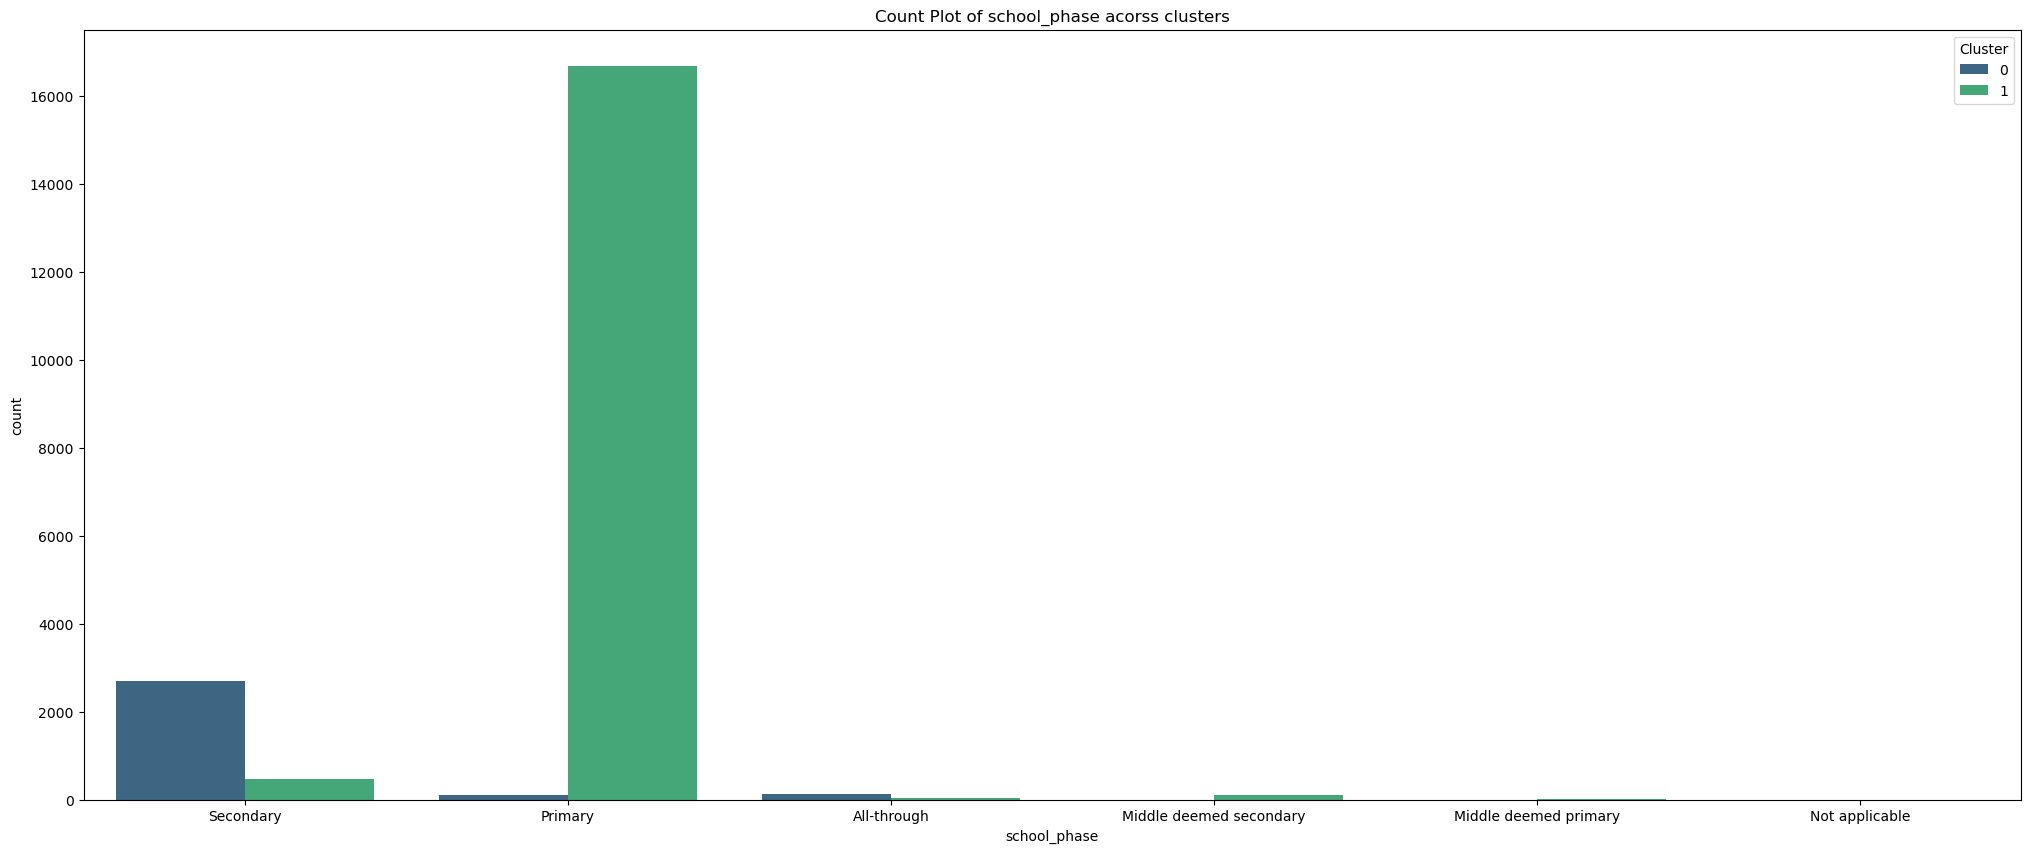

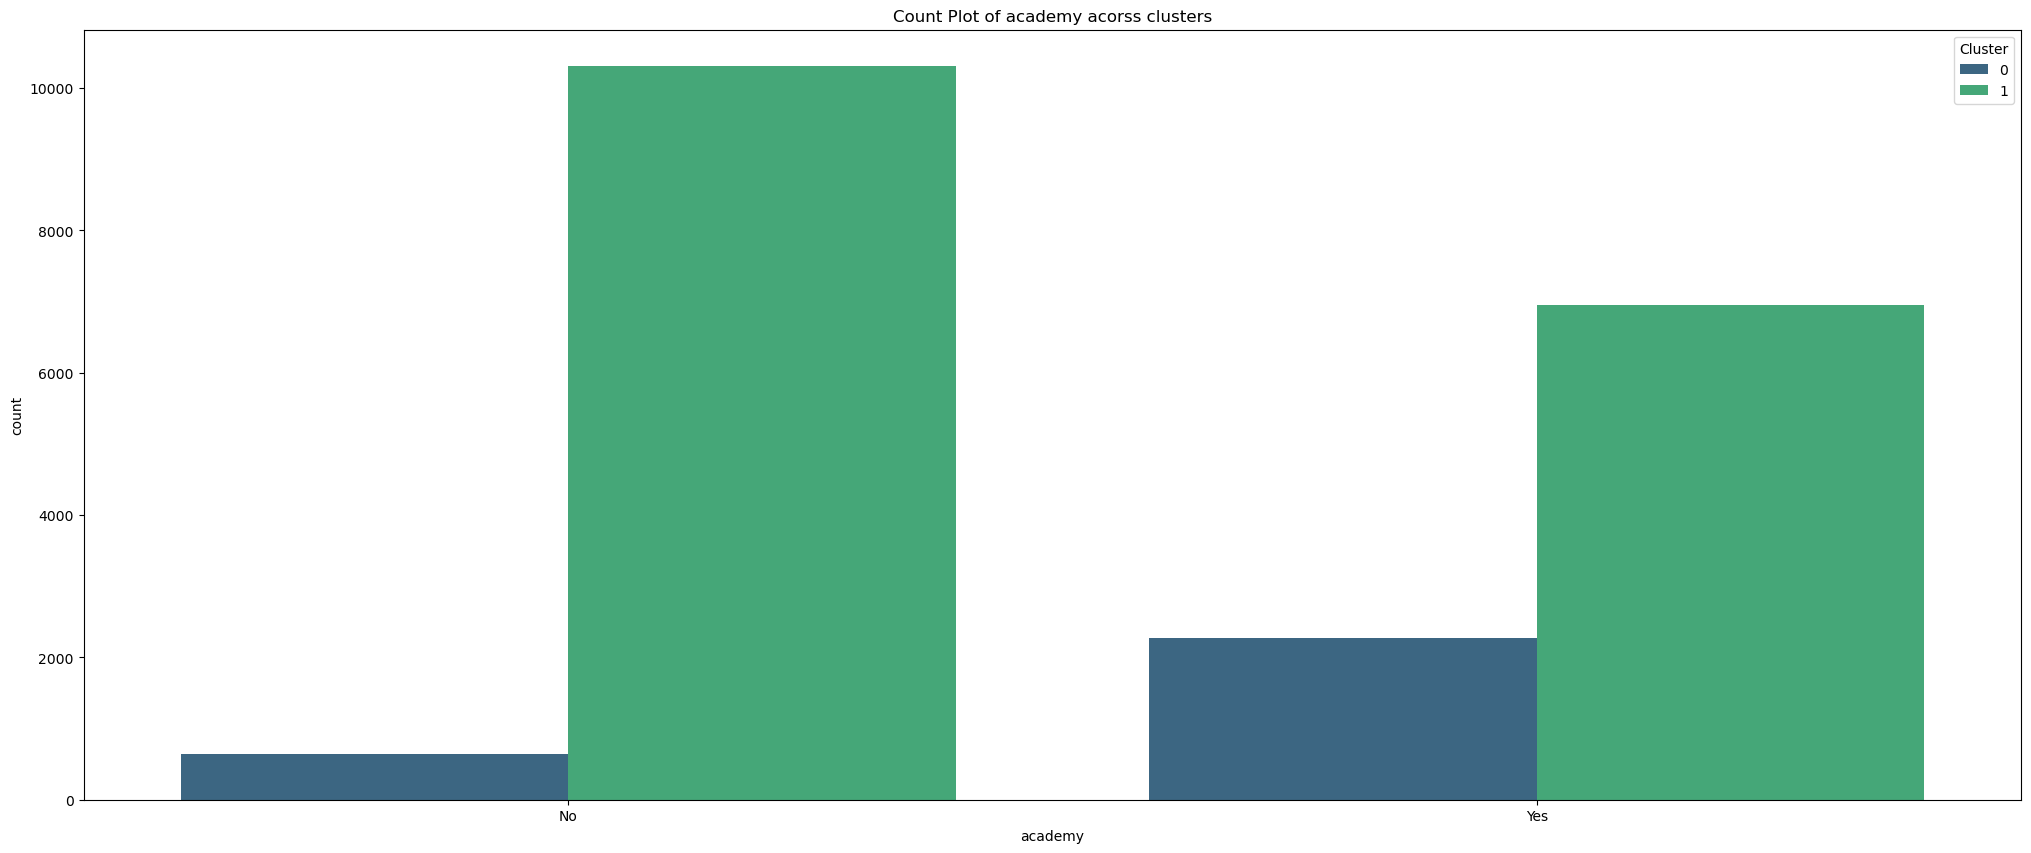

In [38]:
for cat_feature in list(fund_cat.columns):
    plt.figure(figsize = (25,10))
    sns.countplot(x=cat_feature, hue='Cluster', data=fund, palette='viridis')
    plt.title(f'Count Plot of {cat_feature} acorss clusters')
    plt.show()

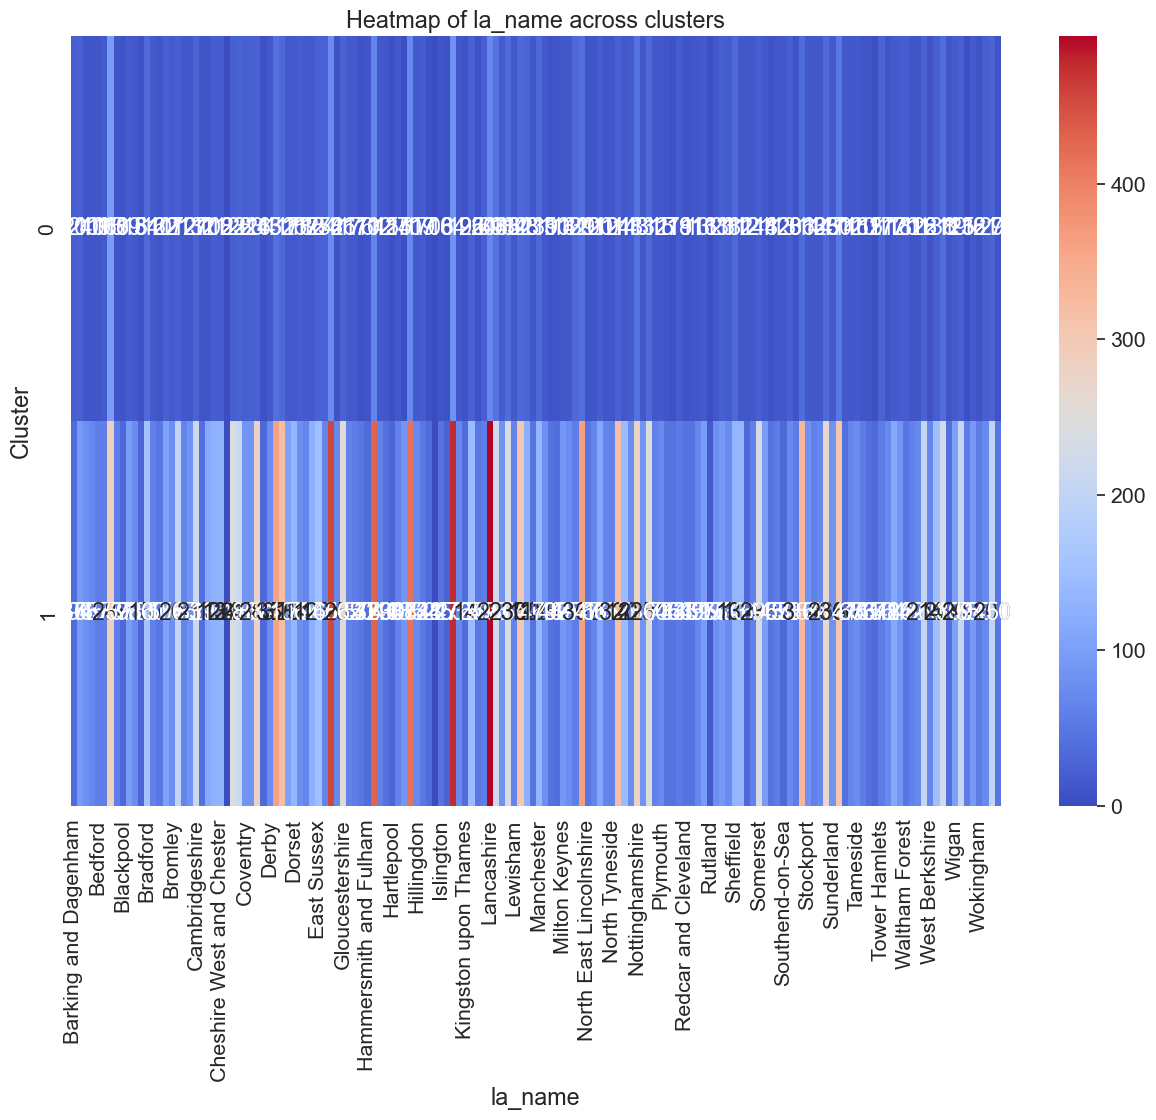

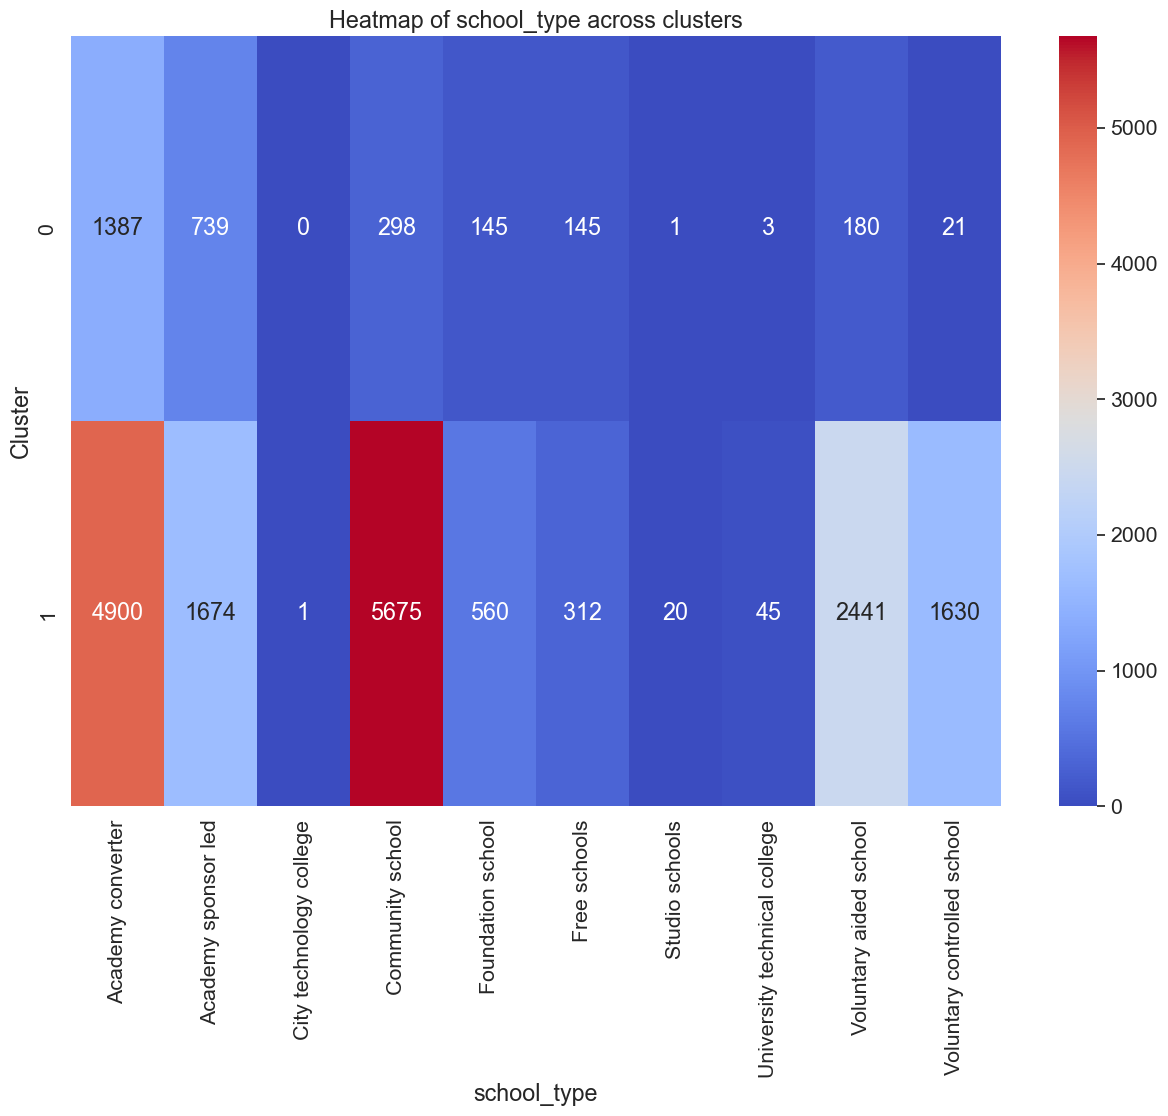

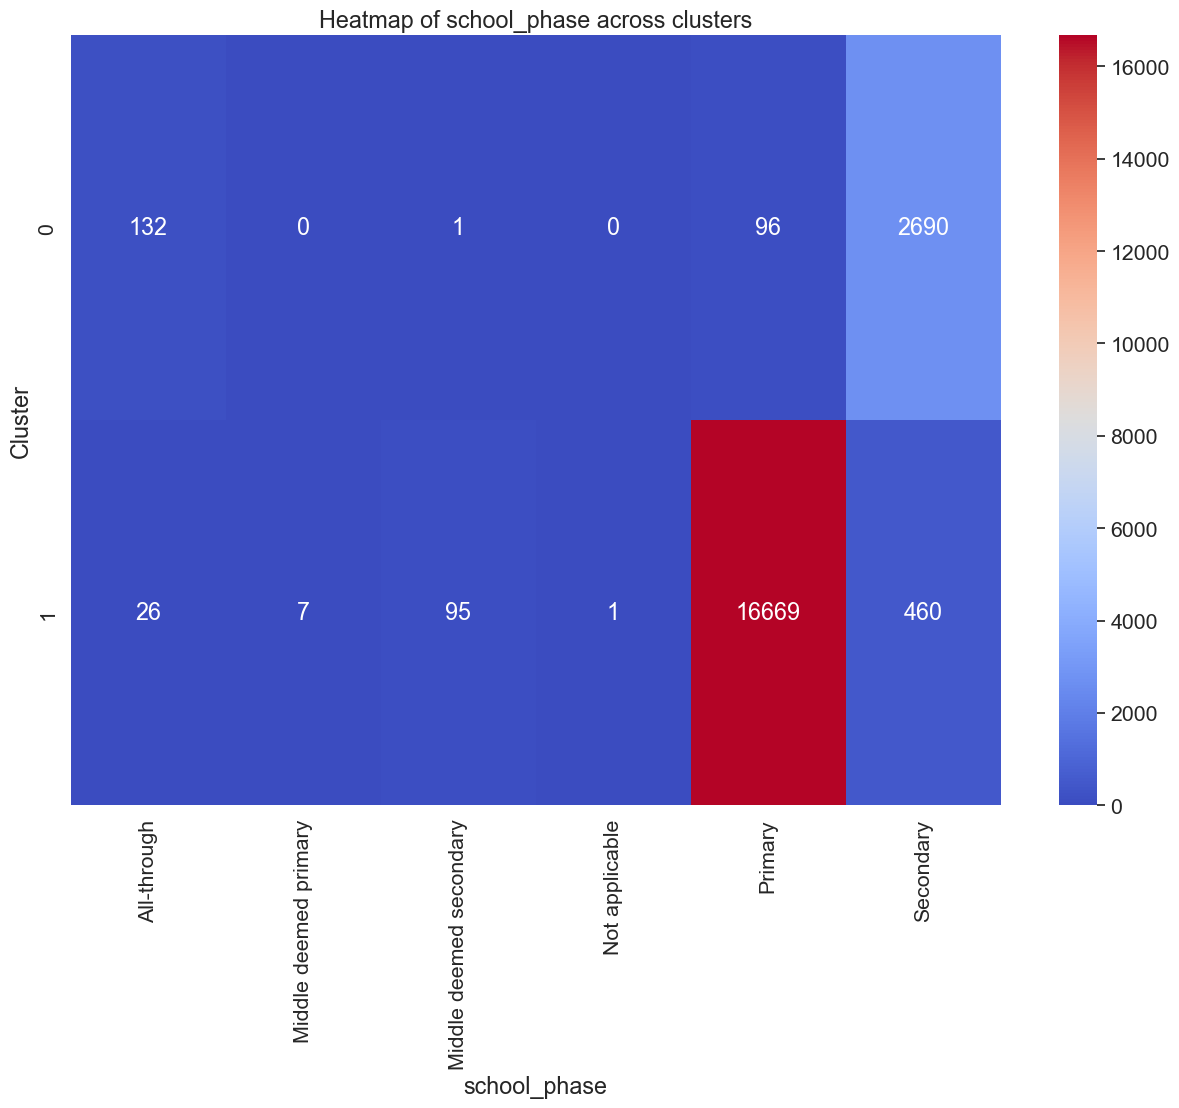

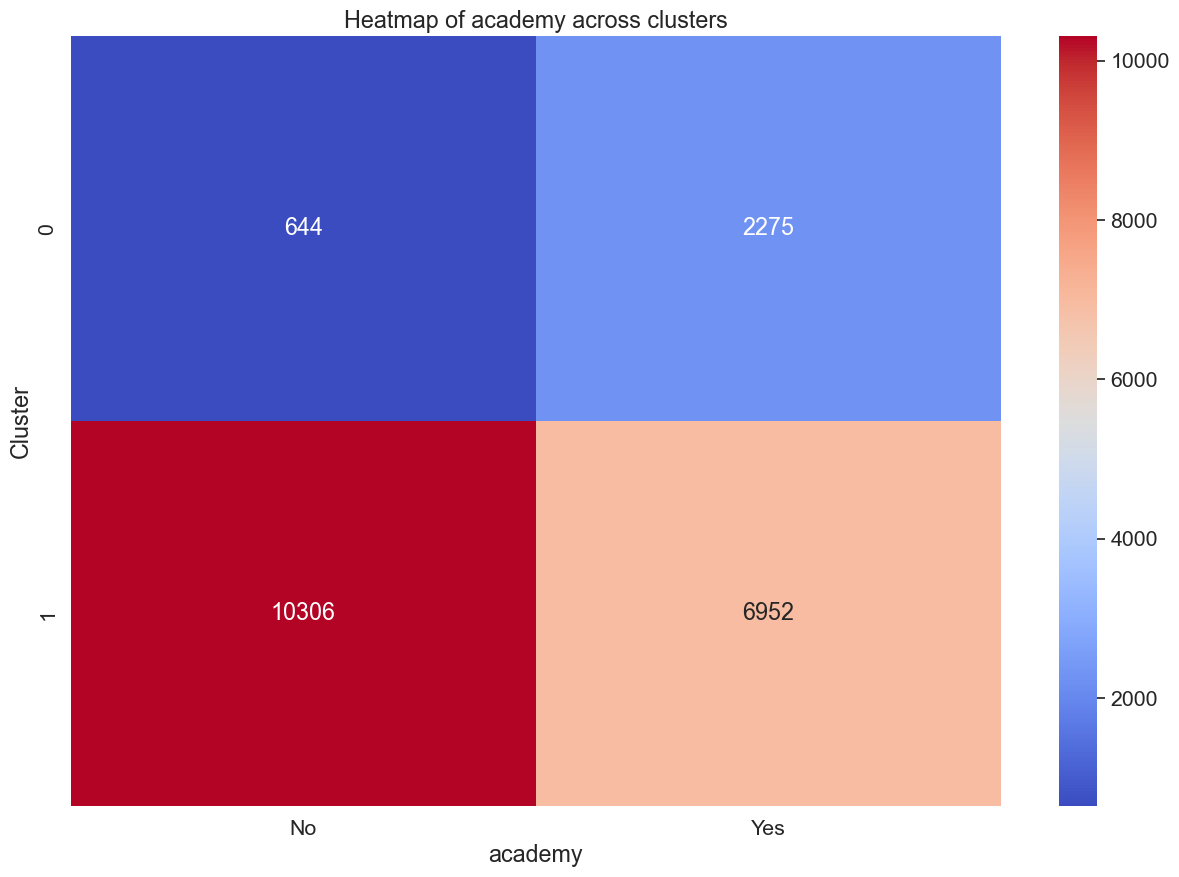

In [39]:
cat_features = fund_cat.columns.tolist()
for feature in cat_features:
    crosstab_data = pd.crosstab(index=fund['Cluster'],columns=fund[feature])
    
    plt.figure(figsize=(15,10))
    sns.set(font_scale=1.4)
    sns.heatmap(crosstab_data, annot=True, cmap='coolwarm', fmt='g')
    plt.title(f'Heatmap of {feature} across clusters')
    plt.show()

In [32]:
fund[fund["Cluster"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
basic_entitlement_total_funding,2919.0,4.853020e+06,1.421318e+06,6434.000000,3.864026e+06,4.756032e+06,5.762682e+06,13551855.0
idaci_funding,2919.0,2.420470e+05,1.807439e+05,0.000000,9.948750e+04,2.103420e+05,3.467465e+05,1082605.0
deprivation_total_funding,2919.0,5.943574e+05,3.468455e+05,0.000000,3.281050e+05,5.282460e+05,7.847640e+05,2070208.0
lac_total_funding,2919.0,1.106543e+02,9.664096e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,21000.0
eal_total_funding,2919.0,4.210158e+04,5.858545e+04,0.000000,7.650000e+03,2.007000e+04,5.119350e+04,612572.0
mobility_total_funding,2919.0,3.661621e+03,1.391386e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,182521.0
prior_attainment_total_funding,2919.0,3.826318e+05,1.599524e+05,0.000000,2.868920e+05,3.663370e+05,4.627910e+05,1630376.0
lump_sum_total_funding,2919.0,1.271232e+05,1.655551e+04,0.000000,1.213000e+05,1.213000e+05,1.276200e+05,175000.0
sparsity_total_funding,2919.0,1.267557e+02,2.178868e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,80000.0
london_fringe,2919.0,4.561800e+03,2.659797e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,475956.0


In [33]:
fund[fund["Cluster"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
basic_entitlement_total_funding,17258.0,9.072360e+05,586314.093400,0.0,537239.000000,7.206080e+05,1.255518e+06,4.774766e+06
idaci_funding,17258.0,4.129012e+04,49836.383444,0.0,3380.000000,2.146500e+04,6.349500e+04,3.115150e+05
deprivation_total_funding,17258.0,1.085563e+05,105268.693366,0.0,27390.500000,7.346750e+04,1.583808e+05,7.253500e+05
lac_total_funding,17258.0,2.897207e+00,149.142367,0.0,0.000000,0.000000e+00,0.000000e+00,1.100000e+04
eal_total_funding,17258.0,1.659392e+04,27873.104696,0.0,1248.250000,5.156000e+03,1.951300e+04,3.121030e+05
mobility_total_funding,17258.0,1.926089e+03,5121.203838,0.0,0.000000,0.000000e+00,1.036000e+03,1.013250e+05
prior_attainment_total_funding,17258.0,8.273423e+04,57628.245877,0.0,40774.750000,6.864350e+04,1.120352e+05,4.450590e+05
lump_sum_total_funding,17258.0,1.259115e+05,12299.448530,50542.0,121300.000000,1.213000e+05,1.239930e+05,1.750000e+05
sparsity_total_funding,17258.0,5.175787e+03,14547.728379,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+05
london_fringe,17258.0,9.137330e+02,6356.058584,0.0,0.000000,0.000000e+00,0.000000e+00,1.542480e+05


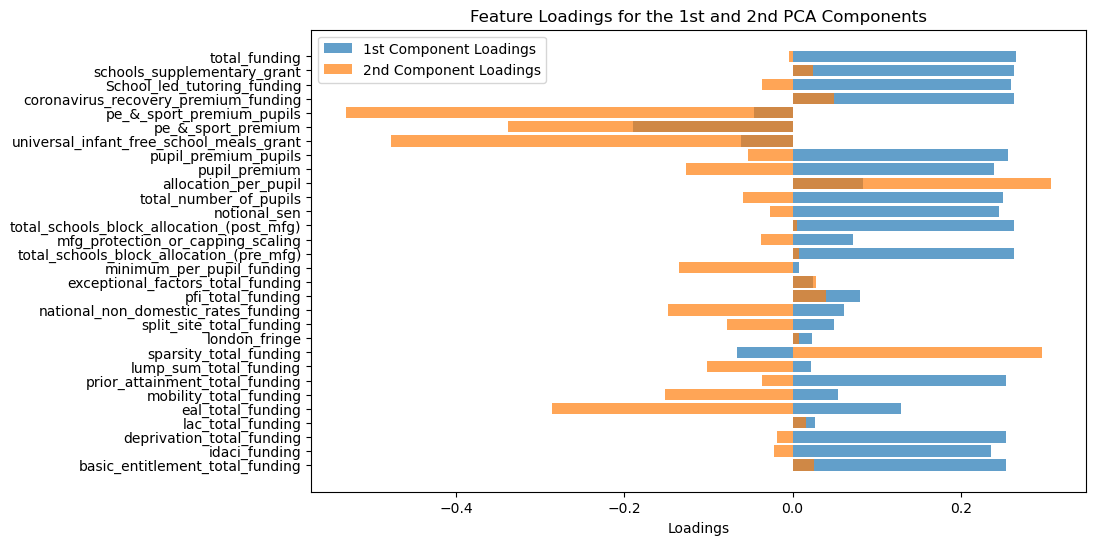

In [34]:
# Plot Loading PCA

# Assuming you have already performed PCA with `pca` and have `X_pca` as the PCA-transformed data
# Extract the loadings for the first two PCA components
first_component_loadings = pca.components_[0]
second_component_loadings = pca.components_[1]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame({'Feature': scaled_num.columns,  # Exclude the 'Cluster' column
                            'First_Component_Loadings': first_component_loadings,
                            'Second_Component_Loadings': second_component_loadings})

# Visualize the feature loadings
plt.figure(figsize=(10, 6))
plt.barh(loadings_df['Feature'], loadings_df['First_Component_Loadings'], alpha=0.7, label='1st Component Loadings')
plt.barh(loadings_df['Feature'], loadings_df['Second_Component_Loadings'], alpha=0.7, label='2nd Component Loadings')
plt.xlabel('Loadings')
plt.title('Feature Loadings for the 1st and 2nd PCA Components')
plt.legend()
plt.show()


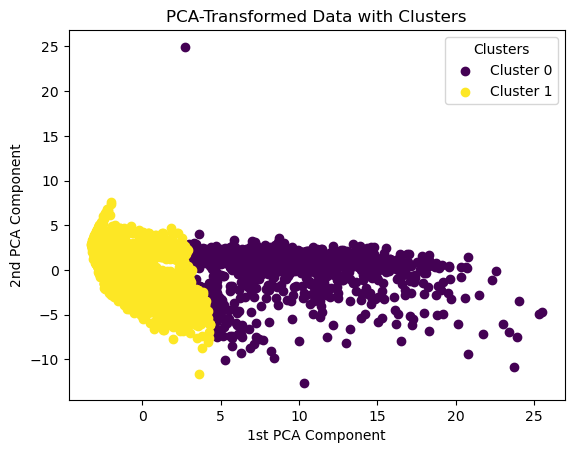

In [35]:
# Assuming fund['Cluster'] contains the cluster labels

# Get unique cluster labels and corresponding colors
unique_clusters = fund['Cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = pca_num[fund['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}', color=colors[i])

plt.xlabel('1st PCA Component')
plt.ylabel('2nd PCA Component')
plt.title('PCA-Transformed Data with Clusters')

# Show the legend
plt.legend(title='Clusters')

plt.show()

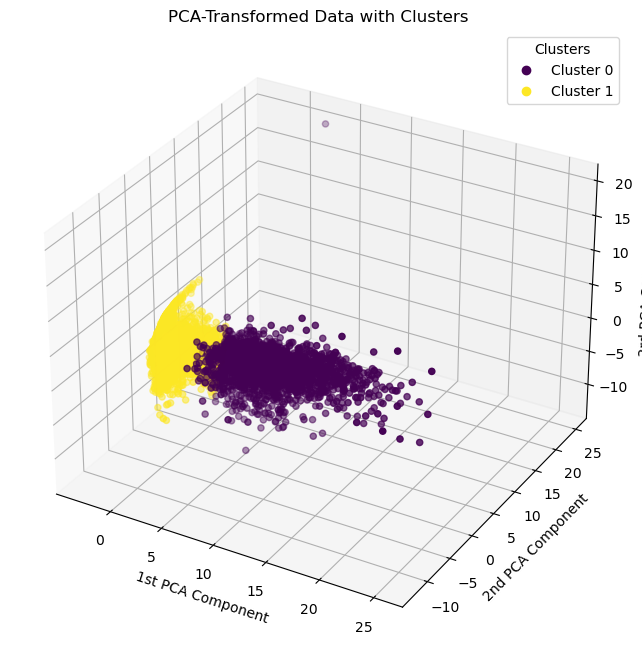

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Assuming pca_num contains the three principal components (PC1, PC2, PC3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming fund['Cluster'] contains the cluster labels
scatter = ax.scatter(pca_num.iloc[:, 0], pca_num.iloc[:, 1], pca_num.iloc[:, 2], c=fund['Cluster'], cmap='viridis')

ax.set_xlabel('1st PCA Component')
ax.set_ylabel('2nd PCA Component')
ax.set_zlabel('3rd PCA Component')
ax.set_title('PCA-Transformed Data with Clusters')

# Get unique cluster labels and corresponding colors
unique_clusters = fund['Cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a legend with the unique cluster labels and manually specified colors
legend_labels = [f'Cluster {cluster}' for cluster in unique_clusters]
legend_elements = [Line2D([0], [0], marker='o', linestyle='', color=colors[i], label=legend_labels[i]) for i in range(len(unique_clusters))]
ax.legend(handles=legend_elements, title='Clusters')

plt.show()